# Kmeans

In [44]:
import pandas as pd
import numpy as np

#Visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# K-means
from sklearn import cluster

## Carregar a Base de Dados - Iris

In [45]:
original = sns.load_dataset('iris')
classes = original['species']
df = original.drop(columns = 'species')
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# KMeans


Parâmetros

- **n_clusters** int, default = 8 - O número de clusters a serem formados, bem como o número de centróides a serem gerados. 
- **init** - {'k-means++', 'random'}, default = 'k-means ++' -  Método de inicialização:
     - 'K-means ++': seleciona os centros de cluster iniciais para o cluster k-mean de uma forma inteligente para acelerar a convergência. Veja a seção Notas em k_init para mais detalhes.
     - 'Random': escolha observações de n_clusters (linhas) aleatoriamente a partir dos dados para os centróides iniciais.
     - Se um array for passado, ele deve ter o formato (n_clusters, n_features) e fornecer os centros iniciais.
     - Se um chamável for passado, ele deve receber os argumentos X, n_clusters e um estado aleatório e retornar uma inicialização. 
- **n_init** - int, padrão = 10 - Número de vezes que o algoritmo k-means será executado com diferentes sementes de centróide. Os resultados finais serão o melhor resultado de n_init execuções consecutivas em termos de inércia.
- **max_iter** - int, default = 300 - Número máximo de iterações do algoritmo k-means para uma única execução.
- **tol** - float, padrão = 1e-4 - Tolerância relativa com relação à norma de Frobenius da diferença nos centros do cluster de duas iterações consecutivas para declarar convergência. 
- **verbose** - -int, default = 0 - Modo de verbosidade.
- **random_state** - int, instância RandomState ou None, default = None -  Determina a geração de número aleatório para inicialização do centróide. Use um int para tornar a aleatoriedade determinística.
- **algorithm** {'auto', 'full', 'elkan'}, padrão = 'auto' - Algoritmo K-means a ser usado. O algoritmo de estilo EM clássico é 'full'. A variação 'elkan' é mais eficiente em dados com clusters bem definidos, usando a desigualdade triangular. No entanto, consome mais memória devido à alocação de uma matriz extra de forma (n_samples, n_clusters).  Por enquanto, 'auto' (mantido para compatibilidade com versões anteriores) escolhe 'elkan', mas pode mudar no futuro para uma heurística melhor. 

Atributos

- **cluster_centers_**  - ndarray de forma (n_clusters, n_features) - Coordenadas de centros de cluster. Se o algoritmo parar antes de convergir totalmente (consulte tol e max_iter), eles não serão consistentes com labels_.
- **labels_** - ndarray de forma (n_samples,) - Rótulos de cada ponto
- **inertia_** - float - Soma das distâncias quadradas das amostras até o centro do cluster mais próximo.
- **n_iter_** - int - Número de iterações executadas. 

In [46]:
agrupador = cluster.KMeans(n_clusters=3)
agrupador.fit(df)

KMeans(n_clusters=3)

## Comparar Centróides Reais X Centróides Calculados

In [47]:
print(agrupador.cluster_centers_)

original.groupby('species').mean()

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Exibir os Clusters

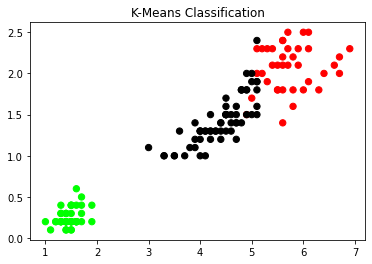

In [48]:
# Criar um mapa de cores
colormap = np.array(['red', 'lime', 'black'])

# Exibir a classificacao do modelo
plt.scatter(
    df['petal_length'],
    df['petal_width'],
    c = colormap[agrupador.labels_],
    s = 40
)
plt.title('K-Means Classification')

plt.show()

# Matriz de Confusão

- A biblioteca **sklearn.metrics** tem a função **confusion_matrix** que irá nos retornar a matriz de confusão dos dados previstos. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista de rótulos para indexar a matriz. Isso pode ser usado para reordenar ou selecionar um subconjunto de rótulos. Se Nenhum for fornecido, aqueles que aparecem pelo menos uma vez em y_true ou y_pred são usados na ordem de classificação 
- **sample_weight** - Pesos de amostra. 
- **normalize**: {‘true’, ‘pred’, ‘all’}, default=None - Normaliza a matriz de confusão sobre as condições verdadeiras (linhas), preditas (colunas) ou toda a população. Se nenhum, a matriz de confusão não será normalizada. 

In [49]:
teste = classes.map({
    'setosa' : 1,
    'versicolor': 2,
    'virginica': 0
})

previsao = agrupador.labels_

In [50]:
confusion_matrix(teste, previsao)

array([[36,  0, 14],
       [ 0, 50,  0],
       [ 2,  0, 48]], dtype=int64)

## Personalizando a matriz de confusão

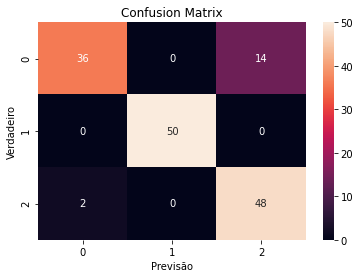

In [51]:
cm = confusion_matrix(teste, previsao)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Previsão');
ax.set_ylabel('Verdadeiro'); 
ax.set_title('Confusion Matrix'); 

# Métricas

- A biblioteca **sklearn.metrics** tem a função **classification_report** que cria um relatório de texto mostrando as principais métricas de classificação. 
- **y_true** - Valores alvo verdadeiros (corretos). 
- **y_pred** - Alvos estimados conforme retornados por um classificador. 
- **labels** - Lista opcional de índices de rótulo a serem incluídos no relatório. 
- **target_names** - Nomes de exibição opcionais que correspondem aos rótulos (mesma ordem) 
- **sample_weight** - Peso das Amostras
- **digits** - Número de dígitos para formatar valores de ponto flutuante de saída. Quando output_dict for True, isso será ignorado e os valores retornados não serão arredondados.
- **output_dict** - Se verdadeiro, retorna a saída como dict
- **zero_division**: 'warn', 0 or 1, default='warn' - Define o valor a ser retornado quando houver uma divisão zero. Se definido como “aviso”, funciona como 0, mas os avisos também são gerados. 

In [52]:
print(classification_report(teste, previsao))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        50
           1       1.00      1.00      1.00        50
           2       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



## Acurácia

- A função **accuracy_score** pode ser usada para verificar a acurácia dos dados

In [53]:
accuracy_score(teste, previsao)

0.8933333333333333

# Melhor Valor de K - Eblow

- Como podemos ver o melhor valor de se aproxima de 3, o mesmo número de classes reais. 

In [57]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(df)
    wcss.append(kmeanModel.inertia_)

C:\Users\Adria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


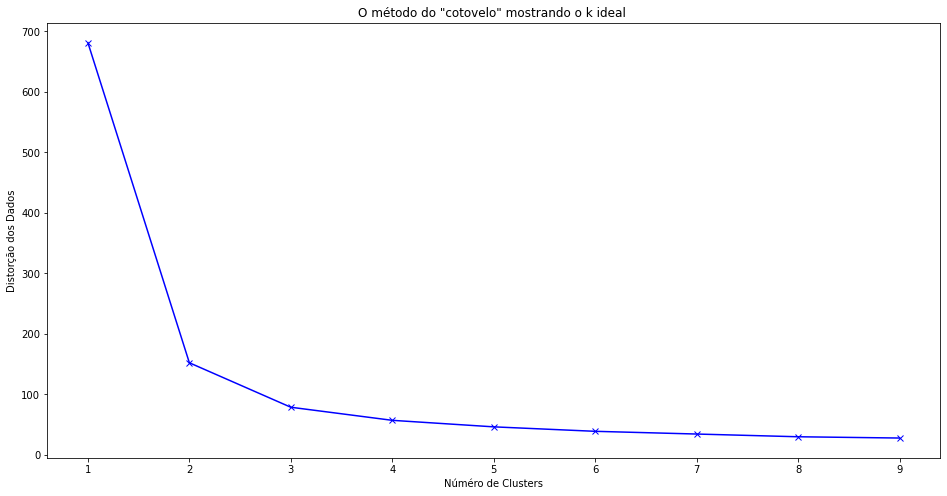

In [59]:
plt.figure(figsize=(16,8))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Núméro de Clusters')
plt.ylabel('Distorção dos Dados')
plt.title('O método do "cotovelo" mostrando o k ideal ')
plt.show()